In [1]:
#importing libraries for reading files
from cmapPy.pandasGEXpress.parse_gct import parse
from cmapPy.pandasGEXpress.write_gct import write
from cmapPy.pandasGEXpress.GCToo import GCToo
import pandas as pd

In [2]:
data=parse('PAAD.gct')

#now to see data, data.data_df

dataDf=data.data_df

print(data)

GCT1.3
src: PAAD.gct
data_df: [18465 rows x 183 columns]
row_metadata_df: [18465 rows x 0 columns]
col_metadata_df: [183 rows x 124 columns]


In [3]:
#removing genes with NaNs and getting their numbers
original_Count=len(dataDf)
newDataDf=dataDf.dropna()
new_count=len(newDataDf)

print("number of genes had NaNs: ",original_Count-new_count)

number of genes had NaNs:  4367


In [4]:
#getting row and col data
row_data_df=data.row_metadata_df
col_data_df=data.col_metadata_df



In [5]:
#data cleaning
droppingCol=['number_of_lymphnodes_positive_by_ihc','lost_follow_up','init_pathology_dx_method_other','informed_consent_verified','igcccg_stage','hiv_status','frequency_of_alcohol_consumption','number_cycles','month_of_form_completion','month_of_dcc_upload','mononucleotide_marker_panel_analysis_status','masaoka_stage','history_prior_surgery_type_other','history_of_neoadjuvant_treatment','gleason_score','prescribed_dose_units','prescribed_dose','followup_treatment_success','followup_case_report_form_submission_reason','follow_ups','file_uuid','extranodal_involvement','ethnicity','drugs','disease_code','days_to_psa','days_to_pancreatitis_onset','days_to_birth','days_to_initial_pathologic_diagnosis','days_to_index','days_to_diabetes_onset','radiations','radiation_type_notes','psa_value','project_code','progression_determined_by-3','primary_pattern','day_of_form_completion','course_number','day_of_dcc_upload','clinical_t','clinical_stage','clinical_n','clinical_m','bcr_followup_uuid','bcr','source_of_patient_death_reason','serum_markers','secondary_pattern','route_of_administration','relative_cancer_type','relative_cancer_type-2','regimen_number','bcr_followup_barcode','bcr_canonical_reason','bcr_canonical_reason-3','bcr_canonical_reason-2','bcr_aliquot_uuid','b_symptoms','anatomic_neoplasm_subdivision_other','participant_id','year_of_initial_pathologic_diagnosis','year_of_tobacco_smoking_onset','year_of_form_completion','year_of_dcc_upload','withdrawn','tumor_type','tumor_tissue_site','total_dose_units','total_dose','additional_studies','days_to_last_followup','bcr_patient_barcode','bcr_patient_uuid','amount_of_alcohol_consumption_per_day','stopped_smoking_year','system_version','tertiary_pattern','therapy_type_notes']

new_col_df=col_data_df.drop(droppingCol,axis=1)


In [6]:
old_col_df=new_col_df.copy()

In [7]:
# getting numerical and categorical data

#categoricalFeatures=['icd_o_3_site','initial_pathologic_diagnosis_method','icd_10','neoplasm_histologic_grade','mononucleotide_and_dinucleotide_marker_panel_analysis_status','history_of_diabetes','history_of_chronic_pancreatitis','histological_type_other','histological_type','histologic_grading_tier_category','gender','person_neoplasm_cancer_status','patient_death_reason','pathologic_t','pathologic_stage','pathologic_n','pathologic_m','other_dx','family_history_of_cancer','radiation_therapy','race','primary_therapy_outcome_success','primary_lymph_node_presentation_assessment','bcr_patient_canonical_status','residual_tumor','anatomic_neoplasm_subdivision','tissue_source_site','sample_type','vital_status','adenocarcinoma_invasion','alcohol_history_documented','alcoholic_exposure_category','surgery_performed_type','targeted_molecular_therapy','tissue_prospective_collection_indicator','tissue_retrospective_collection_indicator']

#numericalFeatures=['number_of_lymphnodes_positive_by_he','lymph_node_examined_count','icd_o_3_histology','maximum_tumor_dimension','number_pack_years_smoked','mRNAseq_cluster','days_to_death','age_at_initial_pathologic_diagnosis','tobacco_smoking_history']

numerical_cols = [cname for cname in new_col_df.columns if  new_col_df[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in new_col_df.columns if  new_col_df[cname].dtype in ['object']]



In [8]:
#printing different histological types
col_data_df['histological_type'].unique()

array(['pancreas-adenocarcinoma-other subtype',
       'pancreas-adenocarcinoma ductal type',
       'pancreas-undifferentiated carcinoma',
       'pancreas-colloid (mucinous non-cystic) carcinoma', nan],
      dtype=object)

In [9]:
#printing different histological types
col_data_df['histological_type_other'].unique()

array(['invasive adenocarcinoma', 'invasive, well-differentiated', nan,
       'poorly differentiated adenocarcinoma', 'neuroendocrine',
       'neuroendocrine carcinoma nos',
       '82463 neuroendocrine carcinoma nos', 'neuroendocrine carcinoma',
       'adenocarcinoma, nos',
       'poorly differentiated pancreatic adenocarcinoma', 'not specified',
       'intraductal tubulopapillary neoplasm',
       'ductal and micropapillary', 'adenocarcinoma- nos',
       'moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%'],
      dtype=object)

In [10]:
#checking total null values for categorical columns
new_col_df[categorical_cols].isna().sum()

chd
sample_type                                                       0
vital_status                                                      0
adenocarcinoma_invasion                                           0
alcohol_history_documented                                       12
alcoholic_exposure_category                                      81
anatomic_neoplasm_subdivision                                     0
bcr_patient_canonical_status                                      0
family_history_of_cancer                                         69
gender                                                            0
histologic_grading_tier_category                                 74
histological_type                                                 1
histological_type_other                                         156
history_of_chronic_pancreatitis                                  37
history_of_diabetes                                              32
icd_10                                      

In [11]:
#filling missing values in categorical columns
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()
for col in categorical_cols:
    new_col_df[col]=imputer.fit_transform(new_col_df[col])

In [12]:
#label encoding categorical column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    new_col_df[col] = label_encoder.fit_transform(new_col_df[col])

In [13]:
#checking total null values for numerical columns
new_col_df[numerical_cols].isna().sum()

chd
mRNAseq_cluster                          5
days_to_death                           88
age_at_initial_pathologic_diagnosis      0
icd_o_3_histology                        0
lymph_node_examined_count                4
maximum_tumor_dimension                 14
number_of_lymphnodes_positive_by_he      4
number_pack_years_smoked               124
tobacco_smoking_history                 35
dtype: int64

In [14]:
#filling missing values in numerical column with mean value
new_col_df=new_col_df.fillna(new_col_df.mean())

In [15]:
#scaling all columns value to similar scale
from sklearn.preprocessing import StandardScaler
X=new_col_df.values
y=new_col_df.index
X = StandardScaler().fit_transform(X)

In [16]:
#getting dimension of data
X.shape

(183, 45)

In [17]:
#doing PCA on data to reduce dimension to 2 from 45
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'],index=y)

In [18]:
#checking transformed data
print(principalDf.head())

                              PC 1      PC 2
cid                                         
aab1-Primary solid Tumor  0.843345 -1.627757
aab4-Primary solid Tumor  5.196407 -1.926496
aab6-Primary solid Tumor  0.595167 -2.106500
aab8-Primary solid Tumor -0.263795 -0.632513
aab9-Primary solid Tumor -1.754012 -1.364467


In [19]:
#printing variance
print('variance_ratio: ',pca.explained_variance_ratio_)
print('variance: ',pca.explained_variance_)

variance_ratio:  [0.0764288  0.06866487]
variance:  [3.45819345 3.10689684]


In [20]:
#importing libraries for plotting
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

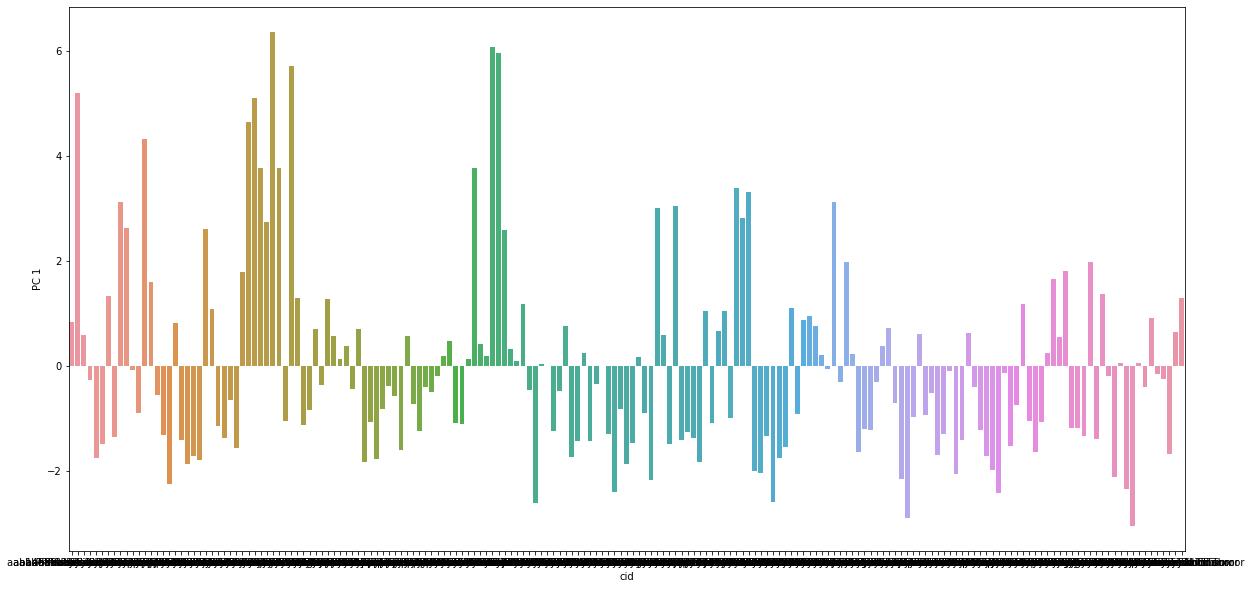

In [21]:
#plotting index with PC 1
plt.figure(figsize=(20,10))
sns.barplot(x=principalDf.index, y=principalDf['PC 1'])

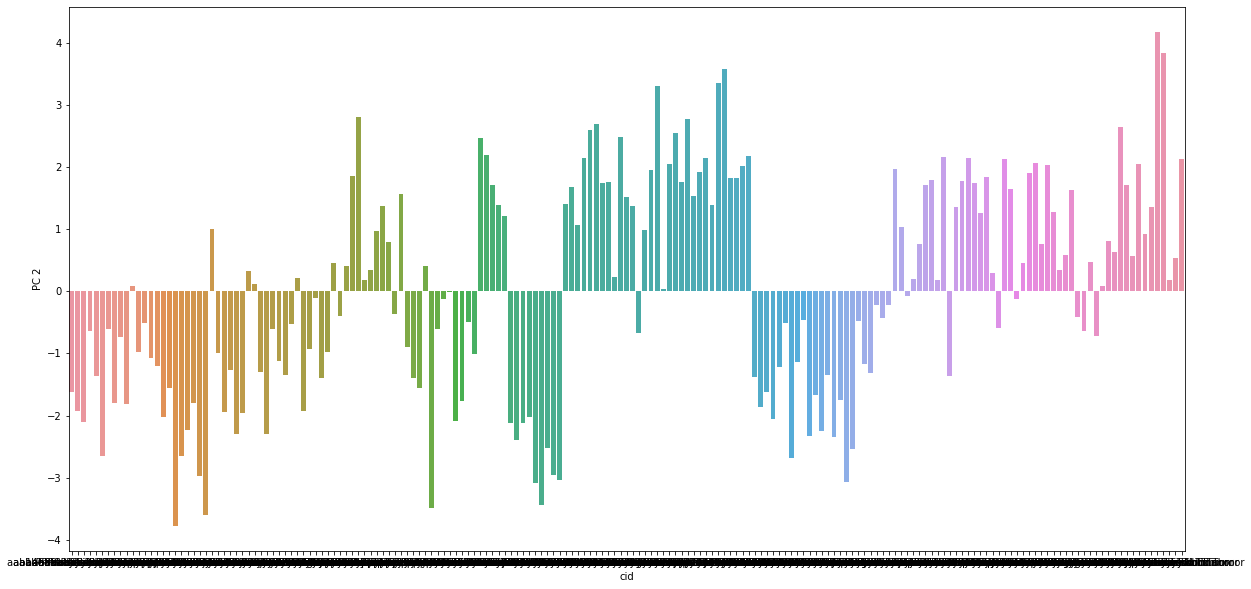

In [22]:
#plotting index with PC 2
plt.figure(figsize=(20,10))
sns.barplot(x=principalDf.index, y=principalDf['PC 2'])

In [23]:
#getting neuroendocrine tumors
neuroEndocrine_col_Df = old_col_df[old_col_df['histological_type_other'].notnull() & (old_col_df['histological_type_other'].str.contains('neuroendocrine'))]

print('neuroEndocrine dataframe: ',neuroEndocrine_col_Df.shape)

neuroEndocrine dataframe:  (9, 45)


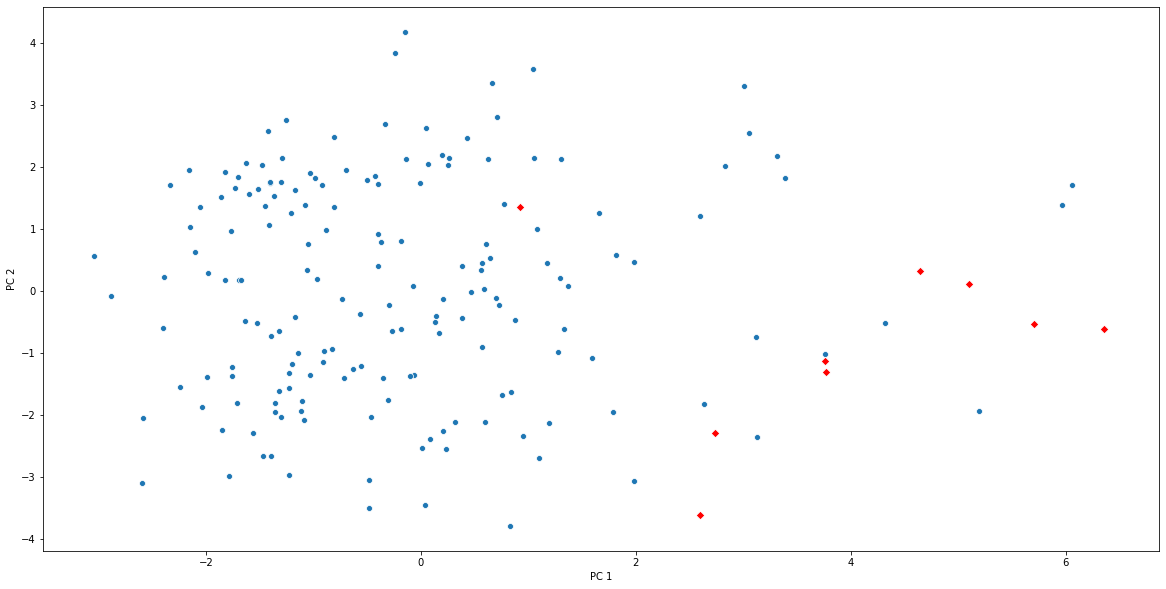

In [24]:
#overlaying neurocrine on top of PCA plot
plt.figure(figsize=(20,10))
sns.scatterplot(x=principalDf['PC 1'], y=principalDf['PC 2'])
sns.scatterplot(x=principalDf.loc[neuroEndocrine_col_Df.index]['PC 1'], y=principalDf.loc[neuroEndocrine_col_Df.index]['PC 2'],color='r',marker="D")


In [25]:
#removing neuroendocine data from dataset
#old_col_df=old_col_df.drop(old_col_df.loc[neuroEndocrine_col_Df.index].index)
#newDataDf=newDataDf.drop(neuroEndocrine_col_Df.index,axis=1)

In [26]:

removed_neuroendocrine_col_df=col_data_df.drop(col_data_df.loc[neuroEndocrine_col_Df.index].index)
removed_neuroendocrine_dataDf=dataDf.drop(neuroEndocrine_col_Df.index,axis=1)

In [27]:
#removing nan values from row_data_df
#row_data_df=row_data_df.loc[newDataDf.index]

In [28]:
#new GCTObj
newGCTooObj = GCToo(removed_neuroendocrine_dataDf,row_data_df,removed_neuroendocrine_col_df)
print("created new data, removed neuroendocine")
print(newGCTooObj)

write(newGCTooObj,'removedNeuroEndocrineData.gct')

created new data, removed neuroendocine
None
src: None
data_df: [18465 rows x 174 columns]
row_metadata_df: [18465 rows x 0 columns]
col_metadata_df: [174 rows x 124 columns]


In [29]:
#reading type 1 IFN gene
type_1_IFN = pd.read_csv('type1_IFN.txt', sep=" ",header=None,index_col=0)

In [30]:
#gettin data of type IFN
type_1_IFN_dataDf=dataDf.loc[type_1_IFN.index,:]

In [31]:
#printing type IFN dataframe
type_1_IFN_dataDf

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
0,,,,,,,,,,,,,,,,,,,,,
IFIT1,9.5,10.5,12.2,10.7,8.6,6.7,9.0,11.4,8.5,7.2,...,8.3,7.6,9.6,8.7,9.4,8.4,9.5,10.4,11.1,10.2
IFI44,9.4,11.1,11.2,10.6,8.8,8.4,9.0,11.1,8.6,7.9,...,8.3,8.3,9.8,10.0,9.3,8.9,9.3,10.6,10.8,10.9
IFIT3,10.0,10.8,11.6,10.3,9.0,7.8,9.4,11.5,9.1,9.1,...,7.9,8.3,9.8,9.8,9.6,9.1,9.6,10.5,10.7,10.2
MX2,9.8,10.7,11.0,10.8,8.3,9.2,9.9,11.1,9.2,9.2,...,9.3,9.2,10.0,9.2,9.7,9.3,10.0,11.4,11.5,10.9
OAS1,11.7,11.0,11.3,10.5,9.2,10.6,10.5,11.4,8.9,7.5,...,8.3,9.5,10.8,8.9,9.5,10.5,10.9,11.1,11.9,10.7
OAS3,11.3,11.9,12.0,11.0,9.7,9.6,10.2,12.3,10.1,9.5,...,9.5,10.0,10.8,10.3,10.0,10.1,10.4,11.1,12.4,11.5
BST2,12.2,12.7,12.7,11.9,10.4,10.9,11.7,11.7,9.9,10.8,...,11.0,11.0,11.8,11.0,12.0,12.2,12.5,12.9,13.4,11.6
IFITM1,11.2,12.9,12.5,12.0,10.6,10.8,11.5,12.1,9.7,10.6,...,11.5,11.4,11.7,10.8,12.1,11.9,11.9,12.2,12.9,12.5
MX1,11.5,12.4,12.6,12.9,10.3,10.1,11.5,13.0,10.7,10.4,...,10.1,10.1,11.9,10.2,10.8,11.0,11.2,12.6,13.6,12.9


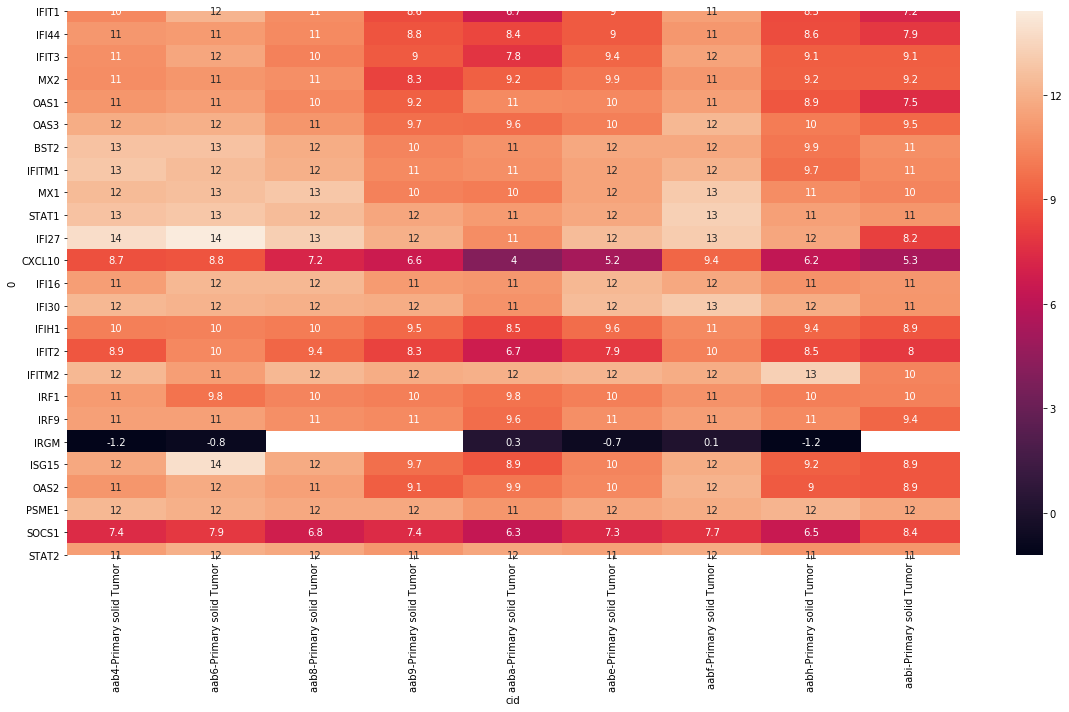

In [32]:
#printing sample heatmap for 10 patients for type 1 IFN gene having pancreatic adenocarcinoma
plt.figure(figsize=(20,10))
sns.heatmap(data=type_1_IFN_dataDf.iloc[:,1:10], annot=True)

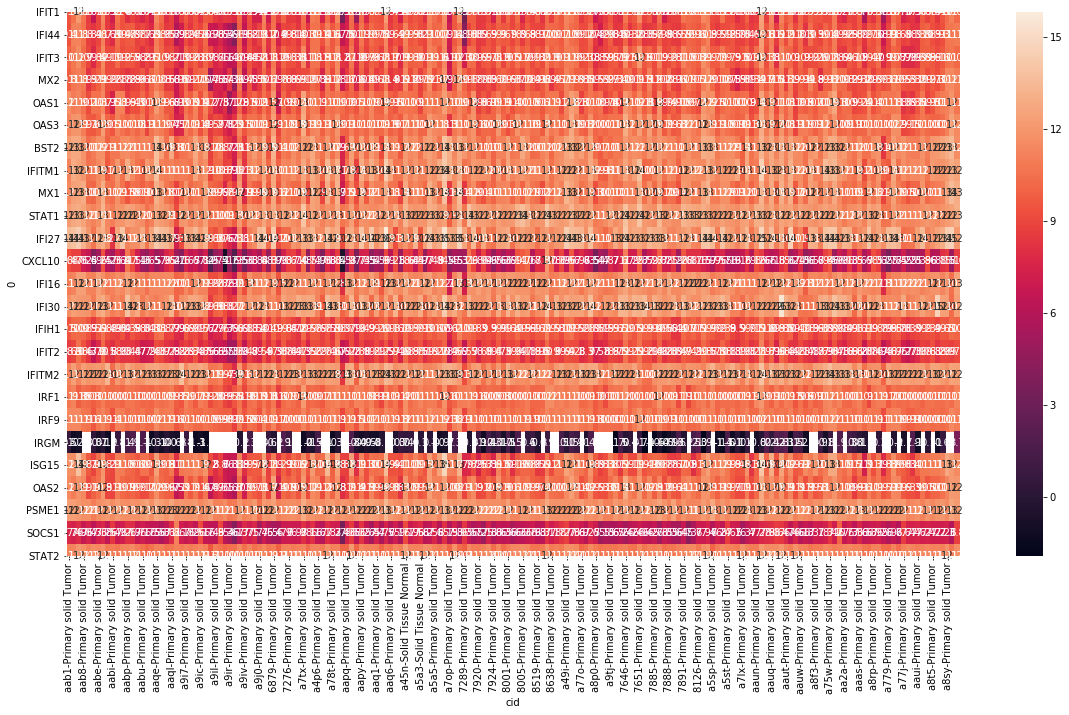

In [33]:
#printing heatmap for all patients for type 1 IFN gene having pancreatic adenocarcinoma
plt.figure(figsize=(20,10))
sns.heatmap(data=type_1_IFN_dataDf, annot=True)

In [34]:
#dropping rows containing Nans
new_IFN_DF=type_1_IFN_dataDf.dropna()

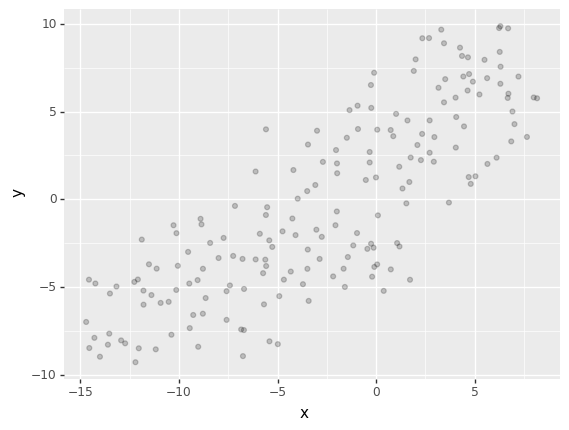

<ggplot: (8793239037677)>

In [35]:
#applying GSVA and checking distribution of GSVA scores for samples
from GSVA import gsva
# Some extras to look at the high dimensional data
from plotnine import *
from sklearn.manifold import TSNE
XV = TSNE(n_components=2).fit_transform(new_IFN_DF.T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)